In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
data= pd.read_csv("C:/Users/pallavi/Desktop/winemag-data_first150k.csv",index_col=0)
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Exploring the data

In [3]:
data.shape

(150930, 10)

The data has 150930 records and 11 columns

In [4]:
#studying tje different columns in the dataset
list(data.columns)


['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

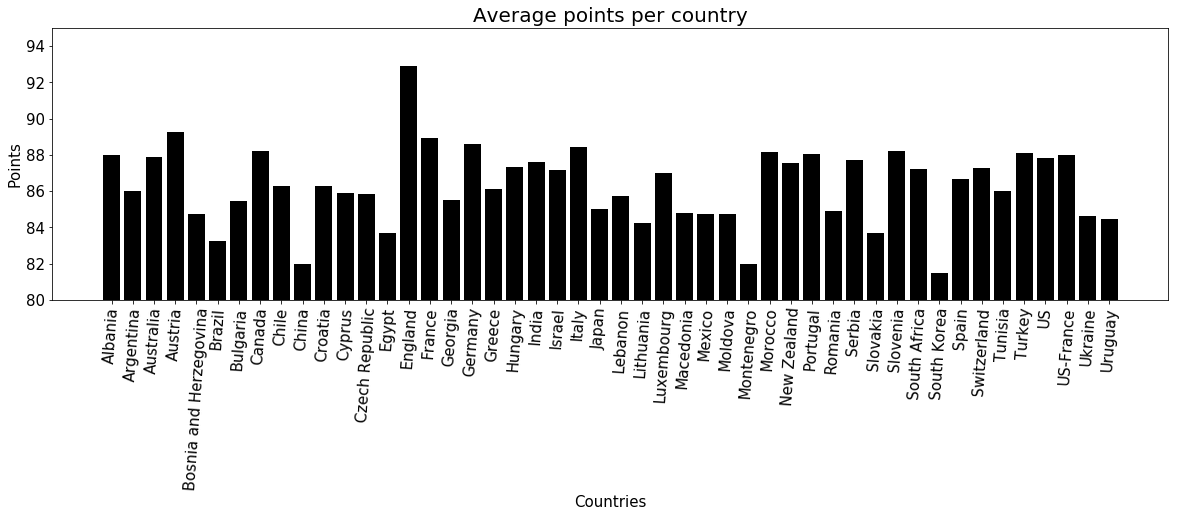

In [5]:
#Analysing the data:
mean_points = data['points'].groupby(data['country']).mean()
#Considering the mean of points for each country
mean_value = [ mean_points[i] for i in range(len(mean_points))]

_country = data.country.unique().tolist()

del(_country[22])
_country = sorted(_country)

plt.figure(figsize=(20,5))
bars = (_country)
y_pos = np.arange(len(bars))
plt.bar(y_pos, mean_value, color = 'black')
plt.xticks(y_pos, bars)
plt.xticks( rotation=86)
plt.ylim(80,95)
plt.title('Average points per country', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Points",fontsize=15)
plt.show()

The bar chart is often use to visualize  distribution of data points. The bar chart  uses vertical bars to show discrete, numerical comparisons across categories. The X-axis of the chart shows the countries being compared and the Y-axis shows the discrete value scale of points. The y scale is narrowed down to a range of 80-95 to better compare the values and all values lie in the same range. As seen from the graph England has the most number of points and South Korea has the least number of points. Since one attribute is been measured a single color is used for the bar graph.

In [6]:
#Counting the variety of wines for each country
count = data['variety'].value_counts()
count.head(3)

Chardonnay            14482
Pinot Noir            14291
Cabernet Sauvignon    12800
Name: variety, dtype: int64

C:\Users\pallavi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\pallavi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Points vs Price')

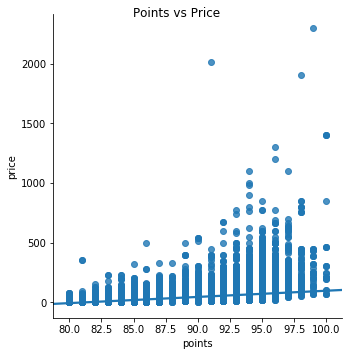

In [7]:
from scipy.stats import pearsonr
import statsmodels.api as sm
#print("Pearson Correlation:", pearsonr(data.price, data.points))
#print(sm.OLS(data.points, data.price).fit().summary())
plt=sns.lmplot(y = 'price', x='points', data=data)
fig=plt.fig
fig.suptitle("Points vs Price", fontsize=12)

As seen from the graph points and price have a postive correlation. Scatterplots visualize the quantitative attributes using horizonatal and vertical spatial position chanels. Points are used to denote the values. Increase in the point(score of the wine) increases the price of the wine.

Preprocessing the data

Replacing the Na values using ffill method

In [8]:
data = data.fillna(method='ffill')
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Napa,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Willamette Valley,Provence red blend,Domaine de la Bégude


In [9]:
features=data[["country", "designation", "price","province","region_1", "region_2","variety","winery"]]
features.head()

,country,designation,price,province,region_1,region_2,variety,winery
0,US,Martha's Vineyard,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,110.0,Northern Spain,Toro,Napa,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,Reserve,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,66.0,Provence,Bandol,Willamette Valley,Provence red blend,Domaine de la Bégude


In [10]:
text_feature=data[["description"]]
text_feature.head()

,description
0,This tremendous 100% varietal wine hails from ...
1,"Ripe aromas of fig, blackberry and cassis are ..."
2,Mac Watson honors the memory of a wine once ma...
3,"This spent 20 months in 30% new French oak, an..."
4,"This is the top wine from La Bégude, named aft..."


In [11]:
res_var=data[["points"]]
res_var.head()

,points
0,96
1,96
2,96
3,96
4,95


Using log value of price for better results

In [13]:
data["logprice"] = np.log(data["price"])
#data.columns
features["logprice"]=data["logprice"].values
features.head()

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,designation,price,province,region_1,region_2,variety,winery,logprice
0,US,Martha's Vineyard,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,5.459586
1,Spain,Carodorum Selección Especial Reserva,110.0,Northern Spain,Toro,Napa,Tinta de Toro,Bodega Carmen Rodríguez,4.700480
2,US,Special Selected Late Harvest,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4.499810
3,US,Reserve,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4.174387
4,France,La Brûlade,66.0,Provence,Bandol,Willamette Valley,Provence red blend,Domaine de la Bégude,4.189655


In [14]:
Features_needed=features[["country","logprice","variety"]]

One hot encoding

In [15]:
Ohc_featuresneeded=pd.get_dummies(Features_needed, sparse=True)

In [16]:
#implementing tf-idf
vectorizer = TfidfVectorizer()
textfeature_tfidf = vectorizer.fit_transform(list(text_feature["description"]))


In [17]:
textfeature_tfidf.shape

(150930, 30748)

In [18]:
#Since number of features are high implementing Dimensionality reduction using truncated SVD (aka LSA).
svd = TruncatedSVD(n_components=100, n_iter=10, random_state=42)
fitsvd=svd.fit(textfeature_tfidf)

In [19]:
fitsvd.explained_variance_ratio_.sum()

0.19087785686651934

In [20]:
textfeature_svd=pd.DataFrame(svd.transform(textfeature_tfidf))

In [21]:
X_featuresneeded_OHC_textfeature_SVD = pd.concat([Ohc_featuresneeded, textfeature_svd], axis=1)

In [22]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X_featuresneeded_OHC_textfeature_SVD, res_var, test_size=0.2, random_state=84)

In [23]:
training_meanprice=X_train["logprice"].mean()
X_train.loc[:,"logprice"].fillna(training_meanprice, inplace=True)
X_test.loc[:,"logprice"].fillna(training_meanprice, inplace=True)

C:\Users\pallavi\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
#X_train["logprice"].values

Running the Models

In [25]:
#Linear Regression
lin_reg=LinearRegression().fit(X_train, y_train)

In [26]:
print(lin_reg.score(X_train, y_train))
#print(lin_reg.coef_)
print(lin_reg.intercept_ )

0.6361919341993152
[4.53484601e+11]


In [27]:
#Refering to code to evaluate the perfomance since I was stuck here
def model_performance(model):
    return pd.DataFrame([[str(round(model.score(X_train, y_train),2)), 
                          str(round(-mean_squared_error(y_train, model.predict(X_train)),2))],[str(round(model.score(X_test, y_test), 2)), 
                        str(round(-mean_squared_error(y_test, model.predict(X_test)),2))]], 
                        index=["Train", "Test"], columns=["Regression Score", "Negative MSE"])

In [28]:
model_performance(lin_reg)

,Regression Score,Negative MSE
Train,0.64,-3.78
Test,-1.0068333248160374e+18,-1.0436779778113335e+19


As seen from the table the test performance is significantly lower than the train performance, possibly due to overfitting of the data. Using Ridge and SVR to check the perfomance accordingly.

In [29]:
#Ridge regression with built-in cross-validation.
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)

In [30]:
model_performance(clf)

,Regression Score,Negative MSE
Train,0.64,-3.78
Test,0.64,-3.77


The test performance for the Ridge Regression is much better than Linear Regression

In [32]:
#Implementing Random Forest. A random forest fits a number of decision tree classifiers on various sub-samples of the 
#dataset and uses averaging to improve the predictive accuracy and control over-fitting and seems like a good fit 
#to try for the dataset

# Number of trees
n_estimators = [2,4,8,16]

# Maximum number of levels in tree
max_depth = [10,20,30,40]


random_grid = {'n_estimators': n_estimators,
               
               'max_depth': max_depth,
               }

In [33]:
# Fit the random search model
rfmodel=RandomizedSearchCV(RandomForestRegressor(max_features="sqrt", random_state=0, bootstrap=False), random_grid, scoring="neg_mean_squared_error", cv=10)

In [34]:
rf=rfmodel.fit(X_train,y_train)

C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

In [35]:
bestrfmodel=rf.best_estimator_.fit(X_train, y_train)

C:\Users\pallavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [36]:
model_performance(bestrfmodel)

,Regression Score,Negative MSE
Train,1.0,-0.0
Test,0.74,-2.65


Random forest has given the best accuracy for the train set compared to the other two models!

In [43]:
#visualizing the results
#rf_bestscore = [rf.cv_results_["split" + str(i) + "_test_score"][5] for i in range(1, 10)]
#ridge_bestscore = [clf.cv_results_["split" + str(i) + "_test_score"][3] for i in range(1, 10)]
grid_scores = rf.grid_scores_
grid_scores

C:\Users\pallavi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -2.86782, std: 0.07395, params: {'n_estimators': 16, 'max_depth': 40},
 mean: -7.26806, std: 0.19784, params: {'n_estimators': 4, 'max_depth': 10},
 mean: -4.84853, std: 0.11686, params: {'n_estimators': 2, 'max_depth': 40},
 mean: -3.15258, std: 0.10454, params: {'n_estimators': 8, 'max_depth': 30},
 mean: -6.94117, std: 0.26871, params: {'n_estimators': 8, 'max_depth': 10},
 mean: -7.60535, std: 0.24692, params: {'n_estimators': 2, 'max_depth': 10},
 mean: -4.22964, std: 0.16800, params: {'n_estimators': 4, 'max_depth': 20},
 mean: -5.22816, std: 0.21745, params: {'n_estimators': 2, 'max_depth': 20},
 mean: -4.92205, std: 0.17445, params: {'n_estimators': 2, 'max_depth': 30},
 mean: -3.15687, std: 0.08439, params: {'n_estimators': 8, 'max_depth': 40}]

In [70]:
topFeatures = ["Price log value"] + ["Component:" + str(r+1) for r in list(X_train.columns[[np.argsort(bestrfmodel.feature_importances_)[::-1][:10]]]) if type(r) is not str]

C:\Users\pallavi\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:1754: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [58]:
topFeatures

['log(price)',
 'SVD component 6',
 'SVD component 8',
 'SVD component 2',
 'SVD component 4',
 'SVD component 1',
 'SVD component 9',
 'SVD component 71',
 'SVD component 44',
 'SVD component 11']

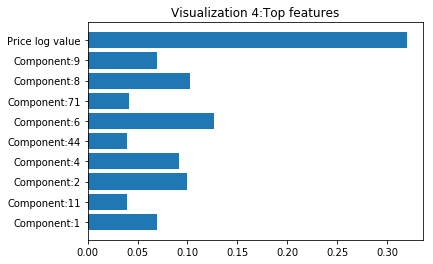

In [71]:
plt.figure()
plt.title("Visualization 4:Top features")
plt.barh(topFeatures, np.sort(bestrfmodel.feature_importances_)[::-1][:10]/sum(np.sort(bestrfmodel.feature_importances_)[::-1][:10]))
plt.show()

As seen from the graph price has a higher influence compared to other features